
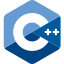
<br>

<div style="text-align:center; font-size:200%;">
 <b>Namespaces</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 06 Namespaces.ipynb -->
<!-- slides/module_150_classes/topic_155_namespaces.cpp -->


# Namespaces in C++

- Mittel zum Vermeiden von Namenskonflikten
- Jeder Namespace ist ein eigener Gültigkeitsbereich (Scope)
  - Gleiche Namen in verschiedenen Namespaces sind erlaubt und führen nicht
    zu Konflikten
- Kann verschiedene Code-Elemente enthalten:
  - Variablen, Funktionen, Strukturen, andere Namespaces, ...

In [ ]:
#include <iostream>

In [ ]:
namespace ns1 {
    int my_var{1};

    void my_function() {
        std::cout << "Hello from ns1!\n";
        std::cout << "my_var = " << my_var << "\n";
    }
}


## Verwenden von Namespaces

- Zugriff mit dem Gültigkeitsbereichsoperator `::` (scope resolution
  operator)

In [ ]:
namespace ns2 {
    int my_var{2};
}

In [ ]:
std::cout << "ns1::my_var = " << ns1::my_var << "\n";
std::cout << "ns2::my_var = " << ns2::my_var << "\n";

In [ ]:
ns1::my_function();


## Mehrere Blöcke

- Ein Namespace kann in mehreren Blöcken definiert werden

In [ ]:
namespace ns3 {
    int my_var{3};
}

In [ ]:
namespace ns3 {
    void my_function() {
        std::cout << "Hello from ns3!\n";
        std::cout << "my_var = " << my_var << "\n";
    }
}

In [ ]:
#include <iostream>

In [ ]:
std::cout << "ns3::my_var = " << ns3::my_var << "\n";

In [ ]:
ns3::my_function();


## Verschachtelte Namespaces

- Namespaces können ineinander verschachtelt werden
- Zugriff auf Elemente in verschachtelten Namespaces mit mehreren
  `::`-Operatoren

In [ ]:
namespace outer_ns {
    namespace inner_ns {
        int my_var{42};
    }
}

In [ ]:
#include <iostream>

In [ ]:
std::cout << "outer_ns::inner_ns::my_var = " << outer_ns::inner_ns::my_var << "\n";


## Verschachtelte Namespaces (C++17)

- Seit C++17 können verschachtelte Namespaces in einer kompakteren Syntax
  definiert werden:

In [ ]:
#include <iostream>

namespace outer_ns_17::inner_ns {
    int my_var{17};
}

In [ ]:
std::cout << "outer_ns_17::inner_ns::my_var = " << outer_ns_17::inner_ns::my_var << "\n";


## Namespace-Aliase

- Kürzer/anderer Namen für einen Namespace
- Syntax: `namespace new_name = old_name;`

In [ ]:
namespace very_long_namespace_name {
    int my_var{4};
}

In [ ]:
namespace short_name = very_long_namespace_name;

In [ ]:
std::cout << "short_name::my_var = " << short_name::my_var << "\n";


## Using-Direktive

- Importieren aller Symbole eines Namespaces in den aktuellen Scope
- Syntax: `using namespace name;`

In [ ]:
#include <iostream>

In [ ]:
namespace ns5 {
    int my_var{5};
    int your_var{55};
}

In [ ]:
{
    using namespace ns5;

    std::cout << "my_var = " << my_var << "\n";
    std::cout << "your_var = " << your_var << "\n";
}


## Using-Deklaration

- Importieren einzelner Elemente eines Namespaces in den aktuellen Scope
- Syntax: `using name::element;`

In [ ]:
namespace ns6 {
    int my_var{6};
    int your_var{66};
}

In [ ]:
{
    using ns6::my_var;

    std::cout << "my_var = " << my_var << "\n";
    std::cout << "your_var = " << ns6::your_var << "\n";
}


## Using-Deklaration (C++17)

- Seit C++17 können mehrere Elemente eines Namespaces in den aktuellen Scope
  importiert werden
- Syntax: `using name::element1, name::element2, ...;`

In [ ]:
namespace ns7 {
    int my_var{7};
    int your_var{77};
}

In [ ]:
{
    using ns7::my_var, ns7::your_var;

    std::cout << "my_var = " << my_var << "\n";
    std::cout << "your_var = " << your_var << "\n";
}


## Using und Overload-Resolution

- Namen, die mit `using` importiert werden, werden bei der Overload-Resolution
  berücksichtigt:

In [ ]:
void foo(bool) { std::cout << "::foo(bool)\n"; }

In [ ]:
namespace ns8 {
    void foo(int) { std::cout << "ns8::foo(int)\n"; }
    void foo(double) { std::cout << "ns8::foo(double)\n"; }
}

In [ ]:
foo(true);
foo(1);
foo(1.0);

In [ ]:
{
    using ::foo;
    using ns8::foo;

    foo(true);
    foo(1);
    foo(1.0);
}

In [ ]:
namespace ns8a {
    void foo(bool) { std::cout << "ns8a::foo(bool)\n"; }
}

In [ ]:
// {
//     using ::foo;
//     using ns8a::foo;
//     foo(true);
// }


## Anonyme Namespaces

- Ein Namespace ohne Namen
- Bietet einen eindeutigen Namespace für jede Translation Unit (Source-Datei)
- Elemente sind nur innerhalb der gleichen Translation Unit zugreifbar
- Sollte nie in Header-Dateien verwendet werden

In [ ]:
namespace {
    int var_in_anonymous_namespace{8};
}

In [ ]:
var_in_anonymous_namespace


## Argument-dependent lookup (ADL)

- Namen von Funktionen werden auch in den Namensräumen der Argumente gesucht

In [ ]:
#include <typeinfo>

template <typename T>
void fun(T t) {
    std::cout << "fun< " << typeid(T).name() << " >(...)\n";
}

template <typename T>
void nofun(T t) {
    std::cout << "nofun< " << typeid(T).name() << " >(...)\n";
}

In [ ]:
namespace ns10 {
    struct MyStruct {
        int x;
        int y;
    };

    void fun(const MyStruct& ms) {
        std::cout << "fun(MyStruct{" << ms.x << ", " << ms.y << "})\n";
    }
}

In [ ]:
ns10::MyStruct ms{10, 20};

In [ ]:
fun(ms);

In [ ]:
ns10::fun(ms);

In [ ]:
::fun(ms);

In [ ]:
nofun(ms);


- ADL betrifft nur Namespaces und nicht Klassen
  - Obwohl der Scope-Operator auch für statische Member von Klassen verwendet
    werden kann

In [ ]:
struct YourStruct {
    int x;
    int y;

    static void fun(const YourStruct& ys) {
        std::cout << "YourStruct::fun()\n";
    }
};

In [ ]:
YourStruct ys{30, 40};

In [ ]:
YourStruct::fun(ys);

In [ ]:
fun(ys);

In [ ]:
nofun(ys);